# Compare the different scores, cosines, spec2vec and Tanimoto

In [2]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path = os.path.join(os.path.dirname(os.getcwd()), "data")
sys.path.insert(0, ROOT)

## Importing Cosine Similarities with NIST powers

In [267]:
import numpy as np

filename = os.path.join(path,'similarities_cosine_tol05_mzp3_intp06.npy')
matrix_similarities_nist = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp3_intp06_matches.npy')
matrix_matches_nist = np.load(filename)

print("Matrix dimension", matrix_similarities_nist.shape)

Matrix dimension (14359, 14359)


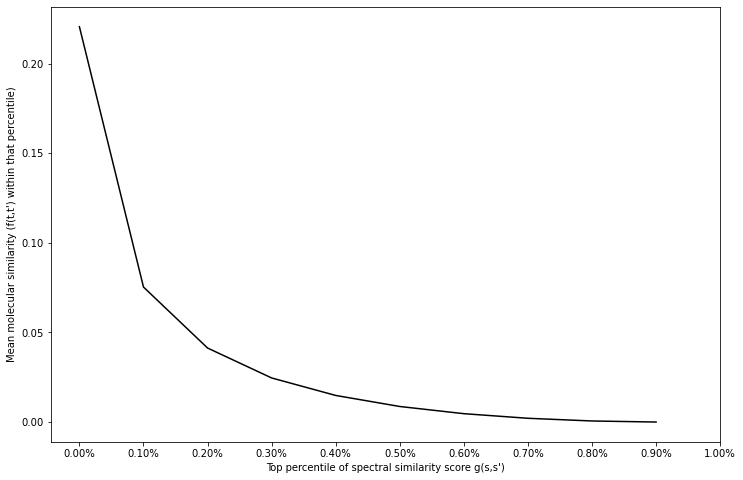

In [265]:
from matplotlib import pyplot as plt

def plot_similarity_matrix_percentile(spectra):
    
    cloned_spectra = spectra.copy()
    
    np.fill_diagonal(cloned_spectra, np.nan)
    nan_indexes = np.where(np.isnan(matrix_copy) == False)
    cloned_spectra = np.sort(spectra[nan_indexes])

    #y_axis = np.split(spectra, chunk)
    y_axis = [cloned_spectra[int((i+1)/10*len(cloned_spectra))-(int(0.1*len(cloned_spectra))) : int((i+1)/10*len(cloned_spectra))] for i in range(10)]
    y_axis = [np.mean(s) for s in y_axis][::-1]

    x_axis = np.linspace(0,1,11)[:-1]

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(
        x_axis,
        y_axis,
        color='black')
    plt.xticks(np.linspace(0, 1, 11),
           ["{:.2f}%".format(x) for x in np.linspace(0, 1, 11)])
    plt.xlabel("Top percentile of spectral similarity score g(s,s')")
    plt.ylabel("Mean molecular similarity (f(t,t') within that percentile)")
    
plot_similarity_matrix_percentile(matrix_similarities_nist)

In [103]:
print(len(segmented))

1436


In [21]:
print(matrix_matches_nist)

[[ 75.  31.  21. ...  32.  30.  33.]
 [ 31.  64.  21. ...  22.  10.  11.]
 [ 21.  21.  36. ...  18.   8.   9.]
 ...
 [ 32.  22.  18. ...  71.  35.  44.]
 [ 30.  10.   8. ...  35. 100.  46.]
 [ 33.  11.   9. ...  44.  46. 100.]]


In [18]:
matrix_similarity_cosine_minmatch6 = matrix_similarities_nist.copy()


In [19]:
 #   print(k+1, s)

## Importing Cosine Similarities with MassBank powers

In [11]:
filename = os.path.join(path,'similarities_cosine_tol05_mzp2_intp05.npy')
matrix_similarities_massbank = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp2_intp05_matches.npy')
matrix_matches_massbank = np.load(filename)

## Importing Cosine Similarities with Demuth powers

In [12]:
filename = os.path.join(path,'similarities_cosine_tol05_mzp0_intp033.npy')
matrix_similarities_demuth = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp0_intp033_matches.npy')
matrix_matches_demuth = np.load(filename)

## Importing Tanimoto Similarities

In [13]:
filename = os.path.join(path, "gcms_similarities_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

## Importing Spec2vec Similarities

In [14]:
filename = os.path.join(path, "similarities_spec2vec_mona_gc_ms_20iter.npy")
matrix_similarities_sspec2vec = np.load(filename)

In [ ]:
from custom_functions.plotting_functions import plot_precentile

percentile_cosine_tol0005 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                            matrix_similarities_cosine_minmatch6,
                                            num_bins=100, show_top_percentile=0.1,
                                            ignore_diagonal=True)